# Exploratory Data Analysis and Data Transformation

In [168]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [169]:
# Import Data

submission_format = pd.read_csv('../data/submission_format.csv')
training_set_features = pd.read_csv('../data/training_set_features.csv')
training_set_labels = pd.read_csv('../data/training_set_labels.csv')
test_set_features = pd.read_csv('../data/test_set_features.csv')

# Transformations

## Binary Variables

`behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
`behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
`behavioral_face_mask` - Has bought a face mask. (binary)
`behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
`behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
`behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
`behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
`doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
`doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
`chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
`child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
`health_worker` - Is a healthcare worker. (binary)
`health_insurance` - Has health insurance. (binary)

In [170]:
training_set_features.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [171]:
# use .loc to change binary column values to dtype bool in training and test sets
training_set_features.loc[:,'behavioral_antiviral_meds':'health_insurance'] = training_set_features.loc[:,'behavioral_antiviral_meds':'health_insurance'].astype(bool)
test_set_features.loc[:,'behavioral_antiviral_meds':'health_insurance'] = test_set_features.loc[:,'behavioral_antiviral_meds':'health_insurance'].astype(bool)

"""
binary variables to convert to bool:
 
behavioral_antiviral_meds
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_large_gatherings
behavioral_outside_home
behavioral_touch_face
doctor_recc_h1n1
doctor_recc_seasonal
chronic_med_condition
child_under_6_months
health_worker
health_insurance
"""

/tmp/ipykernel_11926/812494089.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ... False False False]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_set_features.loc[:,'behavioral_antiviral_meds':'health_insurance'] = training_set_features.loc[:,'behavioral_antiviral_meds':'health_insurance'].astype(bool)
/tmp/ipykernel_11926/812494089.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False  True  True ...  True False  True]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_set_features.loc[:,'behavioral_antiviral_meds':'health_insurance'] = training_set_features.loc[:,'behavioral_antiviral_meds':'health_insurance'].astype(bool)
/tmp/ipykernel_11926/812494089.py:2: FutureWarning: Setting an item of incompatible dtyp

'\nbinary variables to convert to bool:\n \nbehavioral_antiviral_meds\nbehavioral_avoidance\nbehavioral_face_mask\nbehavioral_wash_hands\nbehavioral_large_gatherings\nbehavioral_outside_home\nbehavioral_touch_face\ndoctor_recc_h1n1\ndoctor_recc_seasonal\nchronic_med_condition\nchild_under_6_months\nhealth_worker\nhealth_insurance\n'

In [172]:
training_set_features['health_insurance']

0         True
1         True
2         True
3         True
4         True
         ...  
26702     True
26703     True
26704     True
26705    False
26706     True
Name: health_insurance, Length: 26707, dtype: bool

In [173]:
# Convert target variables to Bool

training_set_labels.loc[:,'h1n1_vaccine':'seasonal_vaccine'] = training_set_labels.loc[:,'h1n1_vaccine': 'seasonal_vaccine'].astype(bool)


/tmp/ipykernel_11926/3236409418.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False False False ... False False False]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  training_set_labels.loc[:,'h1n1_vaccine':'seasonal_vaccine'] = training_set_labels.loc[:,'h1n1_vaccine': 'seasonal_vaccine'].astype(bool)
/tmp/ipykernel_11926/3236409418.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False  True False ...  True False False]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  training_set_labels.loc[:,'h1n1_vaccine':'seasonal_vaccine'] = training_set_labels.loc[:,'h1n1_vaccine': 'seasonal_vaccine'].astype(bool)


# Ordinal / Categorical Variables

Convert from float64 to integers

"""
# ordinal / categorical variables to convert from float to integer
`h1n1_concern`

`h1n1_knowledge`

`opinion_h1n1_vacc_effective`

`opinion_h1n1_risk`

`opinion_h1n1_sick_from_vacc`

`opinion_seas_vacc_effective`

`opinion_seas_risk`

`opinion_seas_sick_from_vacc`

"""
training_set_features.loc[:,'h1n1_concern':'opinion_seas_sick_from_vacc'] = training_set_features.loc[:,'h1n1_concern':'opinion_seas_sick_from_vacc'].astype(int)



# Save Transformed Datasets

In [174]:
training_set_features.to_csv('../data/clean/training_set_features.csv')
training_set_labels.to_csv('../data/clean/training_set_labels.csv')
test_set_features.to_csv('../data/clean/test_set_features.csv')

# Target Variables

Let's look at the distribution of the target variables, to see if there is any class imbalance

In [177]:
training_set_labels['h1n1_vaccine']

0        False
1        False
2        False
3        False
4        False
         ...  
26702    False
26703    False
26704    False
26705    False
26706    False
Name: h1n1_vaccine, Length: 26707, dtype: bool

In [178]:
training_set_labels['h1n1_vaccine'].describe()

count     26707
unique        2
top       False
freq      21033
Name: h1n1_vaccine, dtype: object

In [179]:
training_set_labels['h1n1_vaccine'].value_counts()

h1n1_vaccine
False    21033
True      5674
Name: count, dtype: int64

In [180]:
h1n1_counts = training_set_labels['h1n1_vaccine'].value_counts()
total_h1n1 = h1n1_counts[0] + h1n1_counts[1]
false_h1n1_percentage = (h1n1_counts[0] / total_h1n1) * 100
true_h1n1_percentage = (h1n1_counts[1] / total_h1n1) * 100
print(f"Percentage who had H1N1 vaccine: {true_h1n1_percentage}")
print(f"Percentage who had not had H1N1 vaccine: {false_h1n1_percentage}")


Percentage who had H1N1 vaccine: 21.24536638334519
Percentage who had not had H1N1 vaccine: 78.75463361665481


/tmp/ipykernel_11926/2115513575.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_h1n1 = h1n1_counts[0] + h1n1_counts[1]
/tmp/ipykernel_11926/2115513575.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  false_h1n1_percentage = (h1n1_counts[0] / total_h1n1) * 100
/tmp/ipykernel_11926/2115513575.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_h1n1_percentage = (h1n1_counts[1] / total_h1n1) * 100


<Axes: xlabel='h1n1_vaccine'>

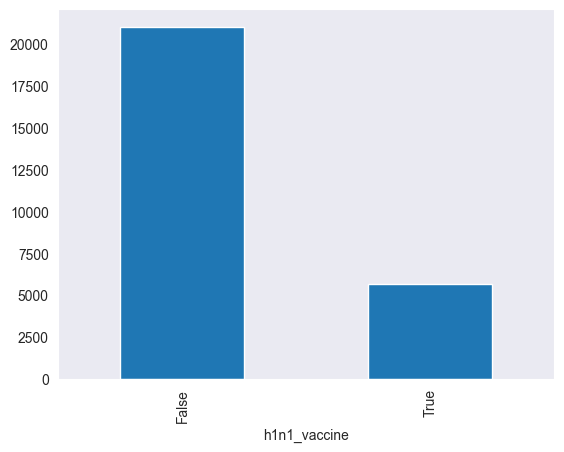

In [181]:
h1n1_counts.plot(kind="bar")

In [182]:

training_set_labels['h1n1_vaccine'].isna().sum()

0

In [183]:
training_set_labels['seasonal_vaccine'].describe()

count     26707
unique        2
top       False
freq      14272
Name: seasonal_vaccine, dtype: object

In [184]:
seasonal_counts = training_set_labels['seasonal_vaccine'].value_counts()
seasonal_counts

seasonal_vaccine
False    14272
True     12435
Name: count, dtype: int64

In [185]:
total_seasonal = seasonal_counts[0] + seasonal_counts[1]
false_seasonal_percentage = (seasonal_counts[0] / total_seasonal) * 100
true_seasonal_percentage = (seasonal_counts[1] / total_seasonal) * 100
print(f"Percentage who had taken seasonal flue vaccine: {true_seasonal_percentage}")
print(f"Percentage who had not had seasonal vaccine: {false_seasonal_percentage}")


Percentage who had taken seasonal flue vaccine: 46.56082674954132
Percentage who had not had seasonal vaccine: 53.43917325045868


/tmp/ipykernel_11926/77800132.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_seasonal = seasonal_counts[0] + seasonal_counts[1]
/tmp/ipykernel_11926/77800132.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  false_seasonal_percentage = (seasonal_counts[0] / total_seasonal) * 100
/tmp/ipykernel_11926/77800132.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_seasonal_percentage = (seasonal_counts[1] / total_season

In [186]:
seasonal_counts.values[1] / seasonal_counts.values[0]

0.8712864349775785

<Axes: xlabel='seasonal_vaccine'>

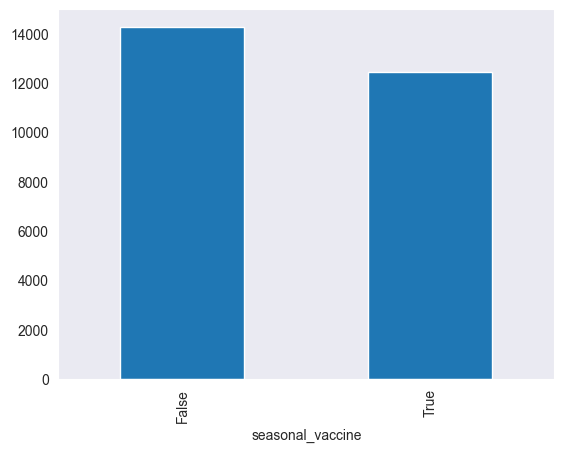

In [187]:
seasonal_counts.plot(kind="bar")

In [188]:
training_set_labels['seasonal_vaccine'].isna().sum()

0

# Feature Variables

demographic

- `age_group`
- `race`
- `sex`
- `marital_status`

socio-economic

- `health_insurance`
- `education`
- `income_poverty`
- `rent_or_own`

employment

- `employment_status`
- `employment_occupation`
- `employment_industry`
- `health_worker`

health

- `h1n1_` variables (2)
- `doctor_` variables (2)
- `chronic_med_condition`

household & family

- `child_under_6_months`
- `household_adults`
- `household_children`

geographical

- `census_msa`
- `hhs_geo_region` 

opinion

- `opinion_` variables (6)

behavioral

- `behavioural_` variables (7)

# Notes

- doctor did recommend seasonal vaccine
- doctor did not recommend h1n1
- tend to be white, older, home owning

# Independent Variables

- demographic
- socio-economic
- employment
- geographical
- health
- household & family


# EDA for Feature Variables

In [189]:
"""
demographic

- `age_group`
- `race`
- `sex`
- `marital_status`

socio-economic

- `health_insurance`
- `education`
- `income_poverty`
- `rent_or_own`

employment

- `employment_status`
- `employment_occupation`
- `employment_industry`
- `health_worker`
"""



'\ndemographic\n\n- `age_group`\n- `race`\n- `sex`\n- `marital_status`\n\nsocio-economic\n\n- `health_insurance`\n- `education`\n- `income_poverty`\n- `rent_or_own`\n\nemployment\n\n- `employment_status`\n- `employment_occupation`\n- `employment_industry`\n- `health_worker`\n'

In [190]:
training_set_features['age_group'].describe()

count         26707
unique            5
top       65+ Years
freq           6843
Name: age_group, dtype: object

(array([5563.,    0., 3848.,    0.,    0., 5215.,    0., 6843.,    0.,
        5238.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

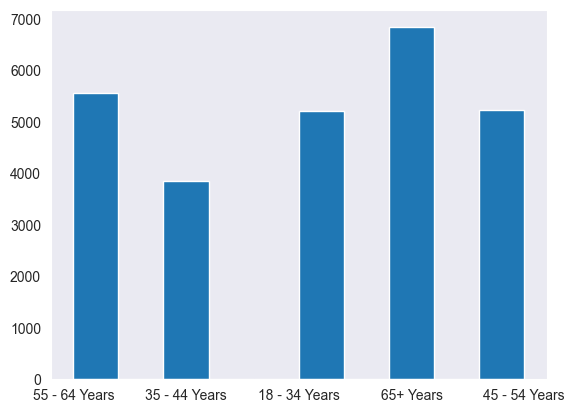

In [191]:
plt.hist([training_set_features['age_group']])

(array([21222.,     0.,     0.,  2118.,     0.,     0.,  1612.,     0.,
            0.,  1755.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

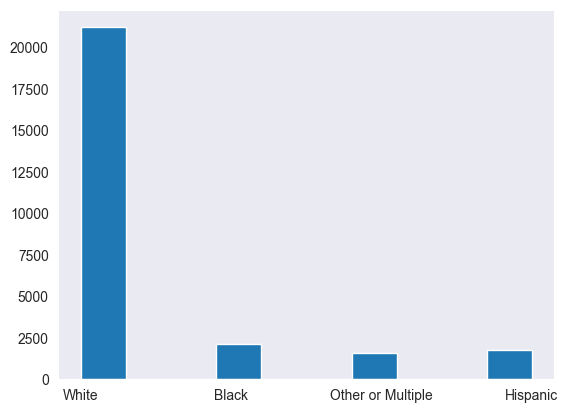

In [192]:
plt.hist([training_set_features['race']])

In [193]:
training_set_features['marital_status'].describe()

count       25299
unique          2
top       Married
freq        13555
Name: marital_status, dtype: object

In [194]:
marital_status = training_set_features['marital_status']

In [195]:
marital_status.value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

(array([15858.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10849.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

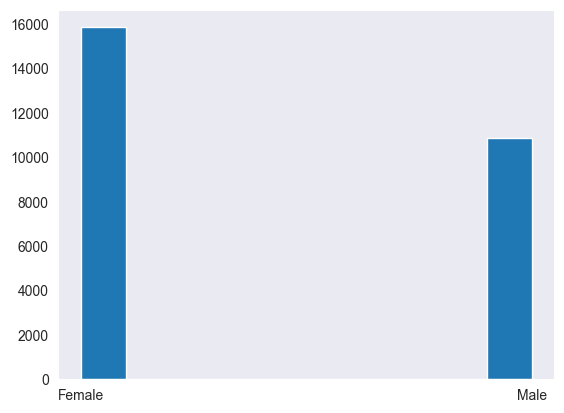

In [196]:
plt.hist([training_set_features['sex']])

In [197]:
training_set_features['health_insurance'].value_counts()

health_insurance
True     24971
False     1736
Name: count, dtype: int64

In [198]:
training_set_features['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [199]:
training_set_features['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [200]:
training_set_features['rent_or_own'].value_counts()

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64

In [201]:
training_set_features['employment_status'].value_counts()

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [202]:
training_set_features['employment_occupation'].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

In [203]:
training_set_features['employment_industry'].value_counts()

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

In [204]:
training_set_features['health_worker'].value_counts()

health_worker
False    23004
True      3703
Name: count, dtype: int64

In [205]:
training_set_features['health_worker'].astype(bool)

0        False
1        False
2        False
3        False
4        False
         ...  
26702    False
26703     True
26704    False
26705    False
26706    False
Name: health_worker, Length: 26707, dtype: bool

In [206]:
training_set_features['health_insurance'].value_counts()

health_insurance
True     24971
False     1736
Name: count, dtype: int64

# Target Variables

targets:

- `h1n1_vaccine` (yes/no)
- `seasonal_flu` vaccine (yes/no)

others:

- behavioral
- opinion

## Notes

- There are no NA (Not Available) values in the target variables
- Around 50% of participants had a seasonal flu vaccine
- Around 20% of participants had a H1N1 vaccine

So, the classes are imbalanced!

We need to take this into account when splitting our train set into train/validation

We might need to over and/or under sample from the H1N1 target class